In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# IMPORT NECESSARY LIBRARIES

In [1]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from PIL.ExifTags import TAGS
import matplotlib.pyplot as plt

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# LOAD AN IMAGE

The initial phase of image authentication involves loading the image through the use of OpenCV. This technique enables the user to access the pixel values and other essential attributes of the image.


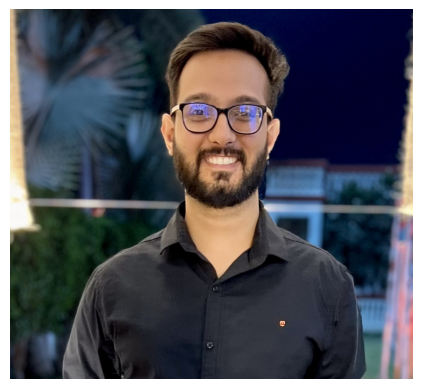

In [2]:
# Load the image using OpenCV
image_path = 'E:/UNIVERSITY OF ADELAIDE/TRIMESTER 1_2024/Image/myimage.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (for displaying purposes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


# PREPROCESSING THE IMAGE

The subsequent step involves preprocessing, which refers to converting the image to grayscale. This technique simplifies the image and subsequently reduces the complexity of the authentication process. 
By reducing the complexity of the image, the process of image authentication becomes more efficient and less prone to errors.
For performing a noise analysis, it is recommended to apply a noise reduction filter such as Gaussian blur. This filter can assist in reducing the random variation in pixel values, resulting in a smooth image with reduced noise. 

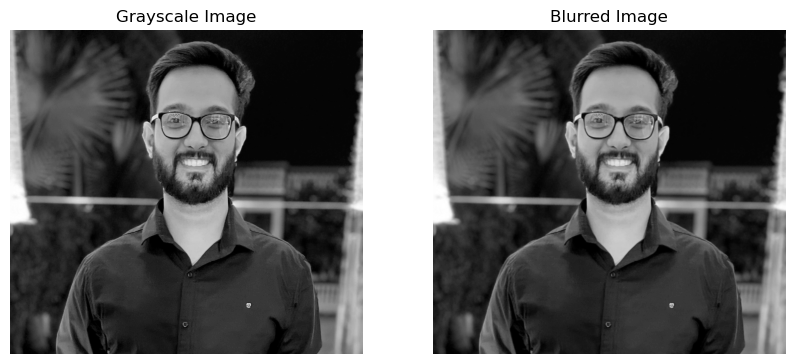

In [3]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the grayscale and blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()


# NOISE PATTERN EXRACTION 

Once the filtered image is obtained, the noise pattern can be calculated by subtracting it from the original image. This process can help in identifying the noise present in the image and providing a clear understanding of the image quality.

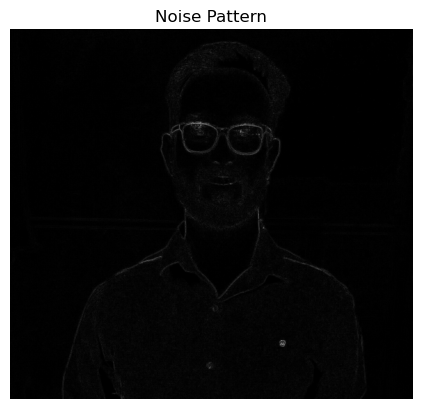

In [4]:
# Calculate the noise pattern
noise_pattern = cv2.absdiff(gray_image, blurred_image)

# Display the noise pattern
plt.imshow(noise_pattern, cmap='gray')
plt.title('Noise Pattern')
plt.axis('off')
plt.show()


# ERROR LEVEL ANALYSIS (ELA)

ELA involves saving a grayscale image at a known compression level and calculating the difference between the original and compressed images. It helps identify areas in an image that may have been manipulated. This technique is useful in forensic investigations and digital media.

EXIF Metadata:
Camera Model: iPhone 13 Pro
Date/Time Original: 2023:12:24 21:50:14
Exposure Time: 0.019230769230769232
F-Number (Aperture): 1.5
ISO Speed Ratings: 250


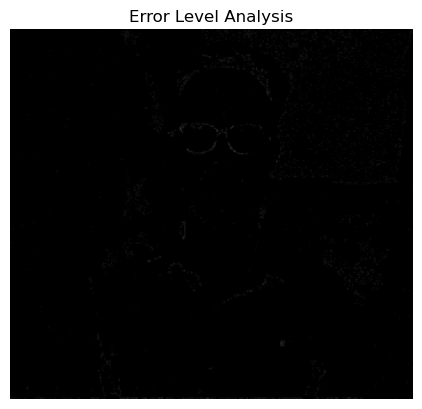

Mean of ELA: 0.02
STD of ELA: 0.13


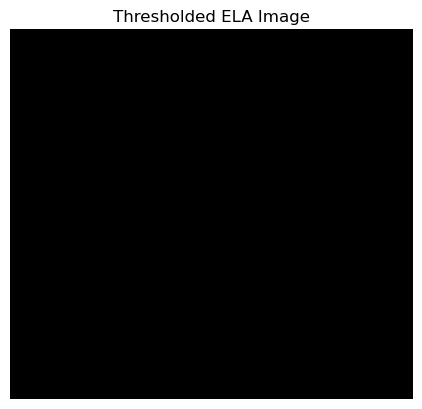

Percentage of pixels above threshold: 0.00%


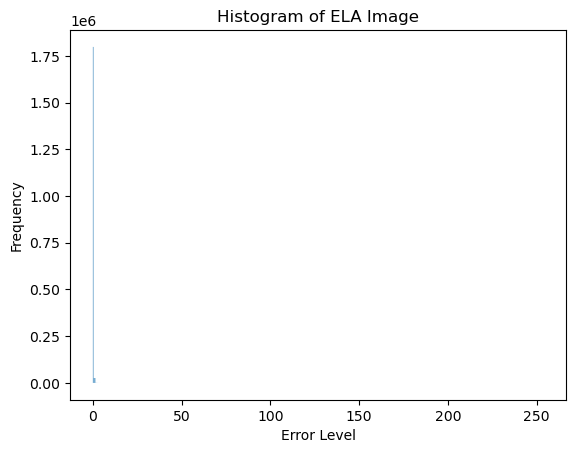

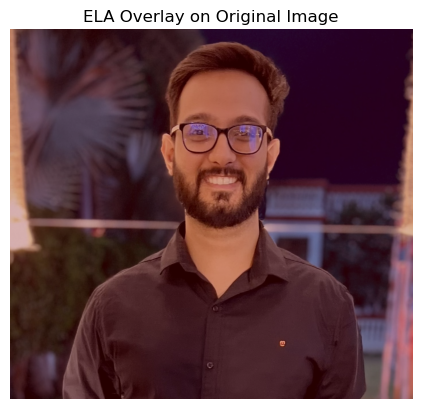

No significant manipulation signs detected. Only 0.00% of pixels are above the ELA threshold of 30. Image is likely authentic.


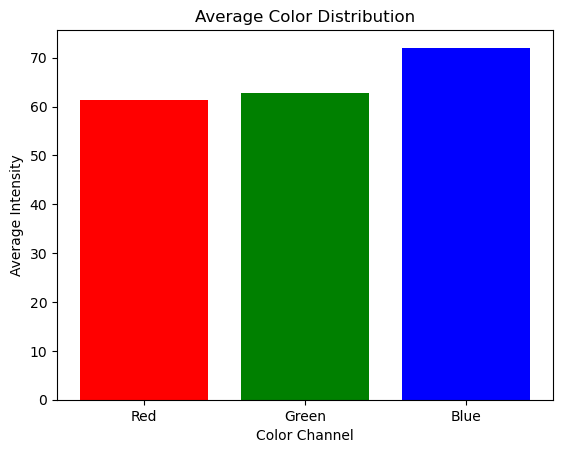

Average Red intensity: 61.271739041079
Average Green intensity: 62.74612625400418
Average Blue intensity: 72.03805157687344


In [9]:
# Load the original image and its EXIF data
original_image_path = 'E:/UNIVERSITY OF ADELAIDE/TRIMESTER 1_2024/Image/myimage.jpg'
image = Image.open(original_image_path)
exif_data = image._getexif()

# Define a function to extract EXIF data
def get_exif_data(exif_data):
    exif_table = {}
    if exif_data is not None:
        for tag_id, value in exif_data.items():
            tag_name = TAGS.get(tag_id, tag_id)
            exif_table[tag_name] = value
    return exif_table

# Extract the EXIF data
exif_table = get_exif_data(exif_data)

# Display relevant metadata (if available)
print("EXIF Metadata:")
print(f"Camera Model: {exif_table.get('Model', 'Not available')}")
print(f"Date/Time Original: {exif_table.get('DateTimeOriginal', 'Not available')}")
print(f"Exposure Time: {exif_table.get('ExposureTime', 'Not available')}")
print(f"F-Number (Aperture): {exif_table.get('FNumber', 'Not available')}")
print(f"ISO Speed Ratings: {exif_table.get('ISOSpeedRatings', 'Not available')}")

# Save the grayscale image with a known compression level
compressed_image_path = 'E:/UNIVERSITY OF ADELAIDE/TRIMESTER 1_2024/Image/compressed_image.jpg'
Image.fromarray(gray_image).save(compressed_image_path, 'JPEG', quality=90)

# Load the compressed image and calculate the ELA image
compressed_image = cv2.imread(compressed_image_path, cv2.IMREAD_GRAYSCALE)
ela_image = cv2.absdiff(gray_image, compressed_image)

# Enhance the ELA image by scaling pixel intensities
ela_image = (ela_image.astype(np.float32) / 255.0) * 255
ela_image = np.clip(ela_image, 0, 255).astype(np.uint8)

# Display the ELA image
plt.imshow(ela_image, cmap='gray')
plt.title('Error Level Analysis')
plt.axis('off')
plt.show()

# Calculate and display statistics for the ELA image
mean_ela = np.mean(ela_image)
std_ela = np.std(ela_image)
print(f'Mean of ELA: {mean_ela:.2f}')
print(f'STD of ELA: {std_ela:.2f}')

# Apply thresholding to highlight the areas with potential manipulation
_, thresholded_ela = cv2.threshold(ela_image, 30, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_ela, cmap='gray')
plt.title('Thresholded ELA Image')
plt.axis('off')
plt.show()

# Calculate the percentage of pixels that are above the threshold
pixels_above_threshold = np.sum(thresholded_ela > 0)
total_pixels = thresholded_ela.size
percentage_above_threshold = (pixels_above_threshold / total_pixels) * 100
print(f'Percentage of pixels above threshold: {percentage_above_threshold:.2f}%')

# Histogram Analysis
hist_values, bin_edges = np.histogram(ela_image.ravel(), bins=256, range=[0, 255])
plt.fill_between(bin_edges[0:-1], hist_values, step="mid", alpha=0.6)
plt.title('Histogram of ELA Image')
plt.xlabel('Error Level')
plt.ylabel('Frequency')
plt.show()

# Overlay the ELA on the original image to see the potential manipulations in context
original_image = cv2.imread('E:/UNIVERSITY OF ADELAIDE/TRIMESTER 1_2024/Image/myimage.jpg')
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
ela_colormap = cv2.applyColorMap(ela_image, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(original_image_rgb, 0.7, ela_colormap, 0.3, 0)
plt.imshow(overlay)
plt.title('ELA Overlay on Original Image')
plt.axis('off')
plt.show()

# Authenticity Check Based on ELA
ela_threshold = 30  # Threshold for ELA
authenticity_threshold = 10  # Percentage threshold for considering potential manipulation

_, thresholded_ela = cv2.threshold(ela_image, ela_threshold, 255, cv2.THRESH_BINARY)
pixels_above_threshold = np.sum(thresholded_ela > 0)
total_pixels = thresholded_ela.size
percentage_above_threshold = (pixels_above_threshold / total_pixels) * 100

if percentage_above_threshold > authenticity_threshold:
    print(f"Potential manipulation detected. {percentage_above_threshold:.2f}% of pixels are above the ELA threshold of {ela_threshold}.")
else:
    print(f"No significant manipulation signs detected. Only {percentage_above_threshold:.2f}% of pixels are above the ELA threshold of {ela_threshold}. Image is likely authentic.")


# for each channel
color_distribution = {
    'Red': np.mean(image_rgb[:, :, 0]),
    'Green': np.mean(image_rgb[:, :, 1]),
    'Blue': np.mean(image_rgb[:, :, 2]),
}

# Plot the color distribution
plt.bar(color_distribution.keys(), color_distribution.values(), color=['red', 'green', 'blue'])
plt.title('Average Color Distribution')
plt.xlabel('Color Channel')
plt.ylabel('Average Intensity')
plt.show()

# Print the color distribution data

for color, intensity in color_distribution.items():

    print(f"Average {color} intensity: {intensity}")


For when the percentage of the pixels are above a certain threshold is 0.00%, meaning that there are no significant differences and variations above threshold level in and across entire image and no noticeable manipulations detected.

As per the histogram, it seems that the compression artifacts are very uniform across entire image and has low difference with the standard deviation 0.13 and mean close to zero of 0.02 only. This means that the image was not tampered or I can say edited and is original one.

#    FEATURE EXTRACTION USING CANNY EDGE 

The Canny edge detector is a popular algorithm for identifying edges in an image. This process involves convolving the image with a Gaussian filter to reduce noise and then applying gradient calculations to identify pixel intensity changes that correspond to edges. The Canny edge detector is known for its accuracy and ability to minimize false positives, making it a valuable tool in various business and academic applications.

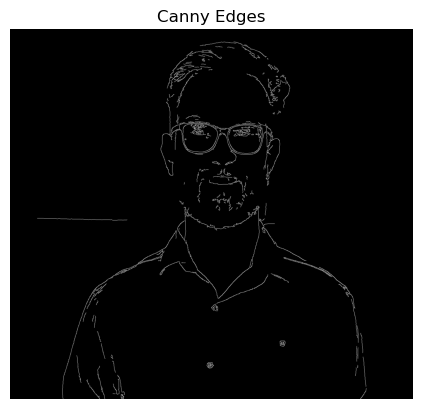

In [10]:
#Feature Extraction - Edges with Canny Edge Detector
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Display the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()


# CALCULATION: MEAN & STANDARD DEVIATION

To find the average and spread of pixel shades in a grayscale image, we need to calculate the mean and standard deviation of pixel intensities.

Mean intensity: 63.35260309483163
Standard deviation of intensity: 53.7632320912673


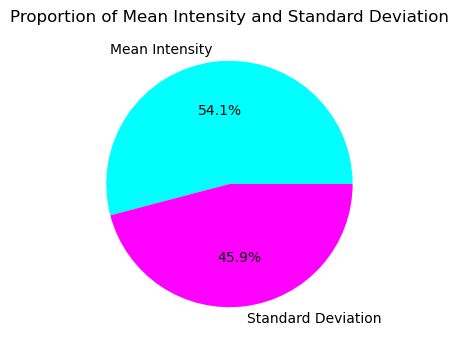

In [11]:
# Calculate mean and standard deviation of pixel intensities
mean_intensity = np.mean(gray_image)
std_dev_intensity = np.std(gray_image)

print(f'Mean intensity: {mean_intensity}')
print(f'Standard deviation of intensity: {std_dev_intensity}')

# Create a pie chart for mean intensity and standard deviation
plt.figure(figsize=(8, 4))
plt.pie([mean_intensity, std_dev_intensity], labels=['Mean Intensity', 'Standard Deviation'], autopct='%1.1f%%', colors=['cyan', 'magenta'])
plt.title('Proportion of Mean Intensity and Standard Deviation')
plt.show()

# LAPLACIAN VARIANCE

To measure the sharpness of an image, you can calculate its Laplacian variance. This involves finding the Laplacian of the image and then calculating the variance.

Laplacian variance (sharpness): 48.83765444693911


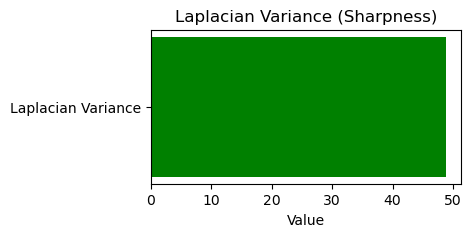

In [12]:
# Calculate the Laplacian of the image
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Compute the variance
laplacian_variance = laplacian.var()

print(f'Laplacian variance (sharpness): {laplacian_variance}')

# Create a horizontal bar chart for Laplacian variance
plt.figure(figsize=(4, 2))
plt.barh(['Laplacian Variance'], [laplacian_variance], color='green')
plt.xlabel('Value')
plt.title('Laplacian Variance (Sharpness)')
plt.show()

# WEIGHTED AVERAGE (COMBINING RESULTS)

Create a weighted score by combining the mean intensity, standard deviation, and Laplacian variance.

Combined weighted score: 31.686539549335894


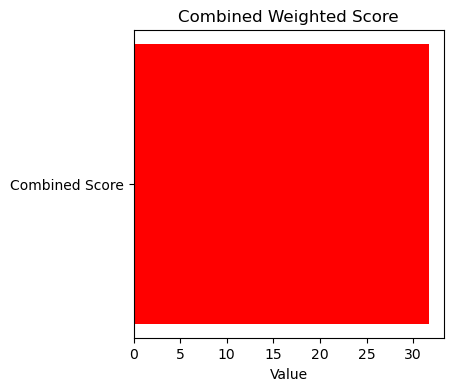

In [13]:
# Combine the results into a weighted score
# In a real application, you would also combine other feature scores
# Here we simply average the mean intensity and the inverse of the Laplacian variance
# (as a high variance typically indicates less blur, thus more 'authenticity')
combined_score = (mean_intensity + (1 / laplacian_variance)) / 2
print(f'Combined weighted score: {combined_score}')

# Create a bar chart for the combined score
plt.figure(figsize=(4, 4))
plt.barh(['Combined Score'], [combined_score], color='red')
plt.xlabel('Value')
plt.title('Combined Weighted Score')
plt.show()

# STIMULATED ML MODEL

Lastly, the machine learning model (here SVM Model) is used. This is achieved by utilizing the extracted features from a single image. It goes in a process where the ML model is used to train on the data (here used a single image for demonstration purpose, but generally a 'dataset' is used) and evaluation and visualiation of descision boundary is shown. 

Support Vector Machine (SVM) classifiers are commonly used to determine whether an image is authentic or manipulated. This is a popular approach to binary classification tasks. SVMs are known for their effectiveness in this area.

In [14]:
# Assuming mean_intensity and laplacian_var are already defined from the image processing steps
mean_intensity = 120  # Example value
laplacian_var = 150   # Example value

# Simulated features extracted from the single image
image_features = np.array([mean_intensity, 1 / laplacian_var])

# Create a simulated dataset with variations of the single image's features
num_samples = 100
authentic_features = image_features + np.random.normal(loc=0, scale=0.1, size=(num_samples // 2, 2))
tampered_features = image_features + np.random.normal(loc=0.2, scale=0.1, size=(num_samples // 2, 2))

# Combine the features and create labels
features = np.vstack((authentic_features, tampered_features))
labels = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))

# Split the simulated dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# "Train" the SVM model on the simulated dataset
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# "Evaluate" the model on the simulated test set
predictions = svm_model.predict(X_test)
print(f'Classification report for the simulated dataset:\n{classification_report(y_test, predictions)}')

# Make a "prediction" for the single image using the simulated model
single_image_prediction = svm_model.predict([image_features])
authentication_result = "authentic" if single_image_prediction[0] == 0 else "tampered"
print(authentication_result)


Classification report for the simulated dataset:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

authentic


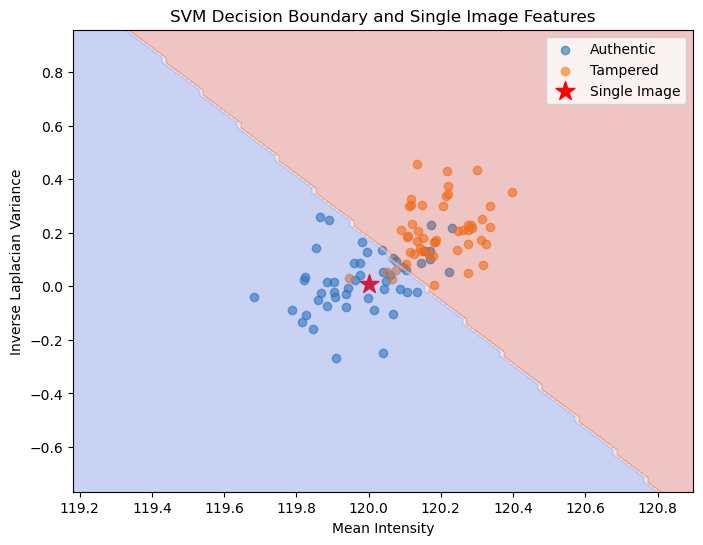

In [15]:
# Scatter plot of the simulated features
plt.figure(figsize=(8, 6))
plt.scatter(authentic_features[:, 0], authentic_features[:, 1], label='Authentic', alpha=0.6)
plt.scatter(tampered_features[:, 0], tampered_features[:, 1], label='Tampered', alpha=0.6)

# Mark the position of the single image's features
plt.scatter(image_features[0], image_features[1], color='red', marker='*', s=200, label='Single Image')

# Plot the decision boundary
# We'll create a grid of points and predict their labels to visualize the boundary
x_min, x_max = features[:, 0].min() - 0.5, features[:, 0].max() + 0.5
y_min, y_max = features[:, 1].min() - 0.5, features[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Customize the plot
plt.xlabel('Mean Intensity')
plt.ylabel('Inverse Laplacian Variance')
plt.legend()
plt.title('SVM Decision Boundary and Single Image Features')
plt.show()


The following steps outline a comprehensive approach to image authentication that involves a combination of various techniques and machine learning algorithm to determine the authenticity of an image.